In [4]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# plt.rcParams['pdf.fonttype'] = 42
# plt.rc('text', usetex=True)
# plt.rcParams['font.sans-serif'] = "Arial"
# plt.rcParams['font.family'] = "sans-serif"

def plot_results(df):
    """Plots the results from the saved DataFrame."""
    sns.set_theme(style="whitegrid", font_scale=1.5, rc={"axes.labelsize": 14, "axes.titlesize": 16})

    fig, axs = plt.subplots(nrows=2, figsize=(12, 6), sharex=False)
    
    for i, dataset_name in enumerate(df["Dataset"].unique()):
        df_subset = df[df["Dataset"] == dataset_name]

        ax = sns.boxplot(
            x="Task Type", y="F1 Score", hue="Model", 
            data=df_subset, width=0.6, linewidth=1.5, ax=axs[i]
        )

        # Set subplot aesthetics
        ax.set_ylabel("F1 Score", fontsize=20, labelpad=10)
        ax.set_title(dataset_name, fontsize=22)

        if i == 0:
            ax.legend(title_fontsize=14, fontsize=16, ncol=2, loc="lower right", frameon=True)
        else:
            ax.legend_.remove()

        # Explicitly set x-tick labels only on the bottom plot
        if i == len(df["Dataset"].unique()) - 1:
            ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
            ax.set_xlabel("Task Type", fontsize=20, labelpad=10)
        else:
            ax.set_xlabel('')
            ax.set_xticklabels([])  # Remove x labels from upper subplot

        # Grid styling
        ax.grid(axis="y", linestyle="--", alpha=0.7)

    # Fix layout
    plt.tight_layout()

    # Save figure in high resolution
    plt.savefig('rcd_results.pdf', bbox_inches='tight', dpi=300)
    # plt.show()

/var/folders/19/8dpm1qss7mn34db1f49thmww0000gn/T/ipykernel_41749/3615354997.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)


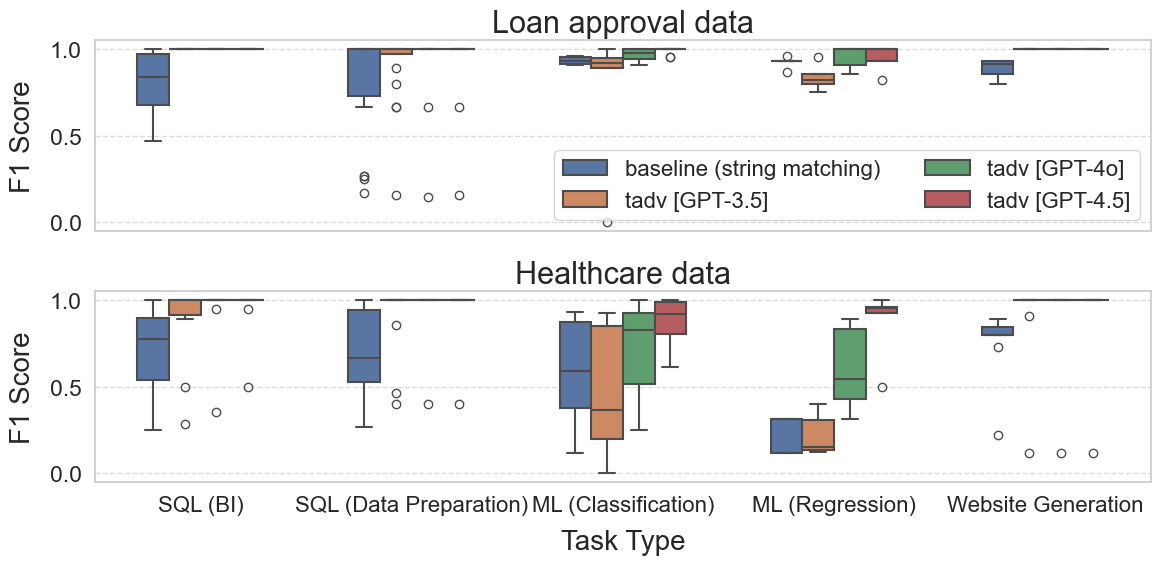

In [5]:
dataset_name_options = ["playground-series-s4e10", "healthcare_dataset"]
model_names = ["string-matching"]
processed_data_label = '0'

df_results = pd.read_csv(Path(".") / "tables" / "rcd_results.csv")

dataset = {
    'playground-series-s4e10': 'Loan approval data',
    'healthcare_dataset': 'Healthcare data',
}

method = {
    'string-matching': 'baseline (string matching)', 
    'gpt-3.5-turbo': 'tadv [GPT-3.5]', 
    'gpt-4o': 'tadv [GPT-4o]',
    'gpt-4.5-preview': 'tadv [GPT-4.5]',
}

tasks = {
     'Biz Intelligence': 'SQL (BI)', 
     'Development': 'SQL (Data Preparation)', 
     'Feature Eng.': 'SQL (Data Preparation)', 
     'Classif.': 'ML (Classification)',
     'Regression': 'ML (Regression)', 
     'Web Gen.': 'Website Generation'
}

df_results['Dataset'] = df_results['Dataset'].map(dataset)
df_results['Model'] = df_results['Model'].map(method)
df_results['Task Type'] = df_results['Task Type'].map(tasks)


plot_results(df_results)
# save as pdf
